# Exploring and Analyzing Text Data Assignment 

In [1]:
import spacy
import string
import pandas as pd
from nltk import pos_tag
from nltk.text import Text
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

#!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

### Read the CNN Lite plain text file articles into a corpus using the NLTK's PlaintextCorpusReader.

In [2]:
PATH = '/content/drive/MyDrive/content/cnn_lite'

DOC_PATTERN = r'.*\.txt'
corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)

### Iterate through the fileids in the corpus, extract the raw text of each document, and store them in a list.

In [3]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]

### Write a function that calculates the following statistics for a document and returns them as a list.

- Number of sentences
- Number of tokens
- Number of words (no stop words or punctuation)
- Number of unique words (vocabulary)
- Number of unique named entities (excluding numbers, dates, times, and currency types)
- Average sentence length
- Average word length
- Lexical diversity

In [4]:
def text_stats(doc):
    sents = sent_tokenize(doc)
    tokens = word_tokenize(doc)
    words = [token.lower() for token in tokens 
             if not token.lower() in stopwords.words('english')
             if not token in string.punctuation]

    num_sents = len(sents)
    num_tokens = len(tokens)
    num_words = len(words)
    vocab = len(set(words))
    characters = sum([len(word) for word in words])
    
    spacy_doc = nlp(doc)
    remove = ['DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY', 
              'ORDINAL', 'CARDINAL']
    entities = [entity.text for entity in spacy_doc.ents 
                if not entity.label_ in remove]

    num_entities = len(set(entities))
    words_sent = num_words / num_sents
    char_word = characters / num_words
    lex_div = vocab / num_words
    
    stats = [num_sents, num_tokens, num_words, vocab, num_entities, 
             words_sent, char_word, lex_div]

    return stats

### Iterate through all the documents, calculate these statistics for each one, and store all the results in a Pandas data frame.

In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:

stats = []

for i, doc in enumerate(docs):
  doc_stats = text_stats(doc)
  doc_stats = [f'Article_{i}'] + doc_stats
  stats.append(doc_stats)

In [7]:
doc_df = pd.DataFrame(stats)
doc_df.columns = ['Document', 'Sentences', 'Tokens', 'Words', 'Vocabulary', 'Entities', 
                  'Avg. Sent Length', 'Avg. Word Length', 'Lexical Diversity']

doc_df.head()

,Document,Sentences,Tokens,Words,Vocabulary,Entities,Avg. Sent Length,Avg. Word Length,Lexical Diversity
0,Article_0,75,1654,830,538,45,11.066667,5.913253,0.648193
1,Article_1,20,469,262,179,25,13.100000,6.248092,0.683206
2,Article_2,262,4573,2126,1124,91,8.114504,5.942615,0.528692
3,Article_3,28,803,454,255,33,16.214286,6.011013,0.561674
4,Article_4,34,620,316,204,16,9.294118,5.924051,0.645570


### Summarize these statistics for the entire corpus by calling the Pandas `describe` method.

In [8]:
doc_df.describe()

,Sentences,Tokens,Words,Vocabulary,Entities,Avg. Sent Length,Avg. Word Length,Lexical Diversity
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,51.385965,1025.192982,542.087719,313.614035,36.122807,11.088300,6.009093,0.671872
std,69.758961,1217.950114,631.513468,259.973608,38.035730,2.439322,0.405653,0.106225
min,4.000000,30.000000,19.000000,18.000000,4.000000,4.750000,5.131579,0.351988
25%,18.000000,372.000000,197.000000,140.000000,15.000000,9.500000,5.736842,0.618750
50%,26.000000,585.000000,320.000000,209.000000,25.000000,10.615385,6.046366,0.667925
75%,63.000000,1297.000000,717.000000,429.000000,45.000000,12.887097,6.315447,0.730263
max,423.000000,7635.000000,3949.000000,1390.000000,238.000000,16.708333,6.827086,0.947368


### Choose a document from the list of documents you created earlier and generate a frequency distribution bar chart for it showing which terms appear most frequently in the text.

In [9]:
doc = docs[39]

cleaned = [token.lower() for token in word_tokenize(doc) 
            if token.lower() not in stopwords.words('english') 
            if token.isalpha()]

fdist = FreqDist(cleaned)

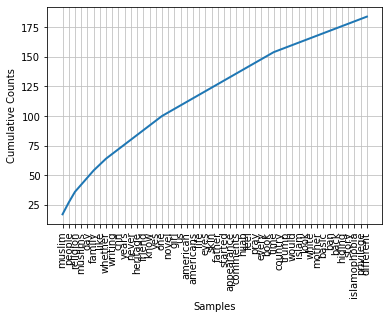

In [10]:
fdist.plot(50, cumulative=True)

In [11]:
dist_plot = fdist.most_common(n=9)

In [12]:
d = pd.DataFrame(dist_plot, columns=['word','frequency'])
d.set_index('word', inplace=True)

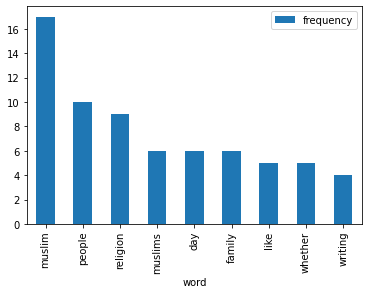

In [13]:
d.plot.bar()

### Generate a word cloud visualization for the same document for which you generated the frequency distribution.

In [14]:
def wordcloud(text, colormap='tab10', background_color='white'):
  cloud = WordCloud(width=1600, height=800, 
                    stopwords=STOPWORDS, 
                    colormap=colormap, 
                    background_color=background_color).generate(text)

  plt.figure(figsize=(12,10))
  plt.imshow(cloud)
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()

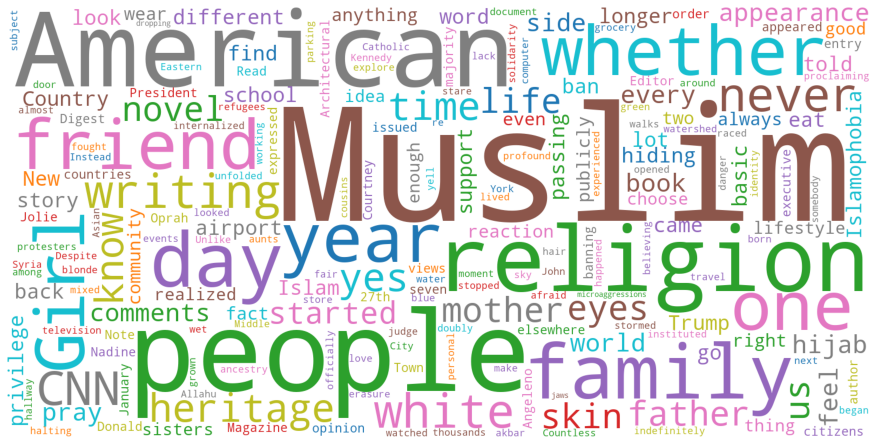

In [15]:
wordcloud(doc)

### Choose a different article (preferably one that references several named entities) and create a dispersion plot that shows the occurrence of those entities throughout the document.

In [16]:
C = ' '.join(docs)

In [17]:
CS = nlp(C)

In [18]:
entities = [(entity.text) for entity in CS.ents if entity.label_ not in ['Quantity']]
d = pd.DataFrame(FreqDist(entities).most_common(6))
d

,0,1
0,Trump,360
1,CNN,221
2,Ukraine,112
3,Taylor,83
4,Democrats,69
5,US,68


In [19]:
es = list(d[0])

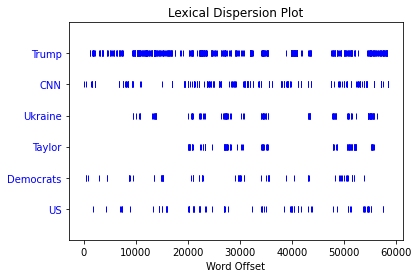

In [20]:
dp = word_tokenize(C)
Text(dp).dispersion_plot(es)

### Choose another article and generate a POS visualization highlighting the parts of speech for tokens in the article.

In [21]:
from yellowbrick.text.postag import PosTagVisualizer

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [22]:
import random
x = random.randrange(0, len(docs))

In [23]:
doc = docs[x]
nltk.download('averaged_perceptron_tagger')
tokens = word_tokenize(doc) 
tagged = pos_tag(tokens)

visualizer = PosTagVisualizer() 
visualizer.transform(tagged)

print(' '.join((visualizer.colorize(token, color)
                for color, token in visualizer.tagged)))
print('\n')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
( CNN ) - Here is a list of incidents of elementary , middle and high school violence with at least one fatality , from 1927 to the present . Suicides , gang-related incidents and deaths resulting from domestic conflicts are not included . If a perpetrator was killed or died by suicide during the incident , their death is not included in the fatality totals . Perpetrators are not included in fatality totals . Because there is no central database tracking school violence incidents , this list is based primarily on media reports and may not be complete or representative of all incidents . READ MORE : Ten years of school shootings . US Timeline ( selected only ) . May 6 , 2019 - STEM School Highlands Ranch - Highlands Ranch , Colorado . Suspects Devon Erickson , 18 , and Alec McKinney , 16 , are apprehen

Yellow brick broke my nltk dispersion plot! Now I have to take a look at it. 

https://www.scikit-yb.org/en/latest/api/text/dispersion.html

In [34]:
print(tokens)

['(', 'CNN', ')', '-', 'Here', 'is', 'a', 'list', 'of', 'incidents', 'of', 'elementary', ',', 'middle', 'and', 'high', 'school', 'violence', 'with', 'at', 'least', 'one', 'fatality', ',', 'from', '1927', 'to', 'the', 'present', '.', 'Suicides', ',', 'gang-related', 'incidents', 'and', 'deaths', 'resulting', 'from', 'domestic', 'conflicts', 'are', 'not', 'included', '.', 'If', 'a', 'perpetrator', 'was', 'killed', 'or', 'died', 'by', 'suicide', 'during', 'the', 'incident', ',', 'their', 'death', 'is', 'not', 'included', 'in', 'the', 'fatality', 'totals', '.', 'Perpetrators', 'are', 'not', 'included', 'in', 'fatality', 'totals', '.', 'Because', 'there', 'is', 'no', 'central', 'database', 'tracking', 'school', 'violence', 'incidents', ',', 'this', 'list', 'is', 'based', 'primarily', 'on', 'media', 'reports', 'and', 'may', 'not', 'be', 'complete', 'or', 'representative', 'of', 'all', 'incidents', '.', 'READ', 'MORE', ':', 'Ten', 'years', 'of', 'school', 'shootings', '.', 'US', 'Timeline', '

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


AttributeError: ignored

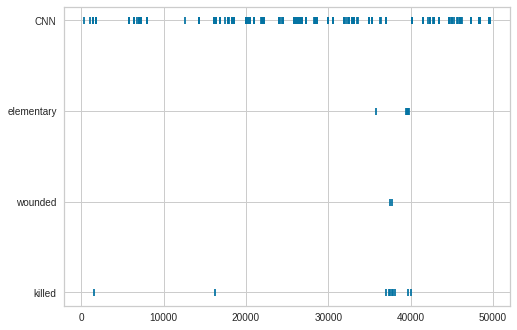

In [48]:
from yellowbrick.text import DispersionPlot

# Create a list of words from the corpus text
text = [doc.split() for doc in docs]
target_words = ['CNN', 'elementary', 'wounded', 'killed']
visualizer = DispersionPlot(target_words)
visualizer.fit(text)
visualizer.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


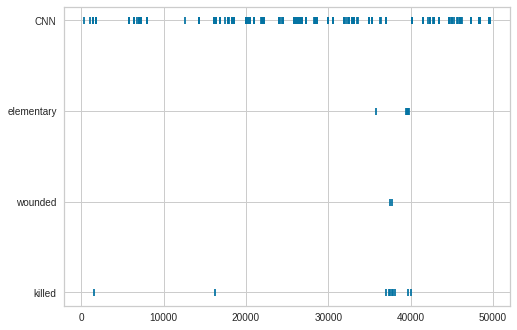

In [49]:
from yellowbrick.text import dispersion
# Create the visualizer and draw the plot
dispersion(target_words, text)
plt.show()